1. Data **Exploration**

5 baris pertama dari dataset:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Ringkasan Statistik:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54

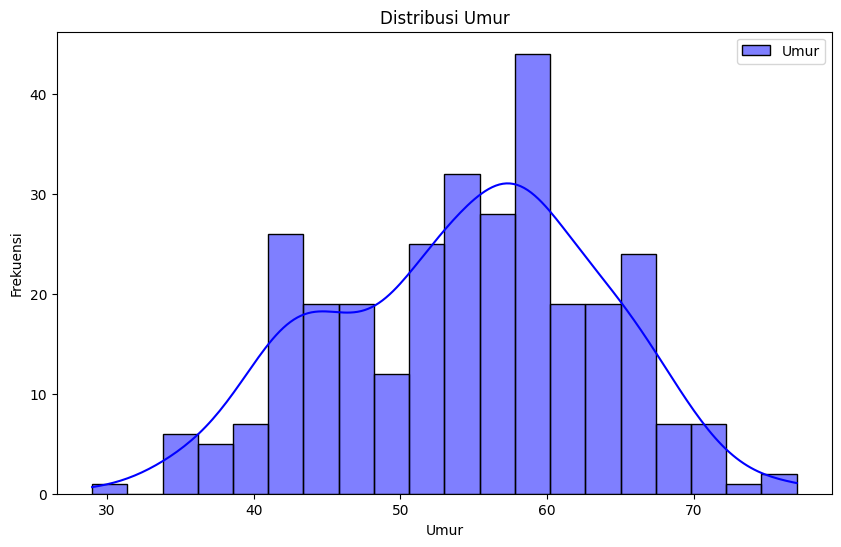

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
data = pd.read_csv("heart.csv")

# Menampilkan beberapa baris pertama dataset
print("5 baris pertama dari dataset:")
display(data.head())

# Informasi tentang dataset
print("\nInformasi dataset:")
print(data.info())

# Statistik deskriptif
print("\nRingkasan Statistik:")
print(data.describe())

# Visualisasi distribusi fitur utama (contoh: umur)
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=20, color='blue', label='Umur')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()


**2. Data Processing**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Memeriksa nilai yang hilang
print("\nCek nilai yang hilang:")
print(data.isnull().sum())

# Deteksi outlier sederhana menggunakan Z-Score
z_scores = np.abs((data - data.mean()) / data.std())
outliers = (z_scores > 3).sum().sum()
print(f"\nJumlah outlier dalam dataset: {outliers}")

# Memisahkan fitur dan target
X = data.drop("output", axis=1)  # Semua kolom kecuali "output"
y = data["output"]  # Kolom "output" sebagai target

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nPembagian data selesai:")
print(f"Data pelatihan: {X_train.shape}, Data pengujian: {X_test.shape}")



Cek nilai yang hilang:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Jumlah outlier dalam dataset: 16

Pembagian data selesai:
Data pelatihan: (242, 13), Data pengujian: (61, 13)


 ** 3. Model Training**




Melatih model...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Akurasi model: 86.89%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



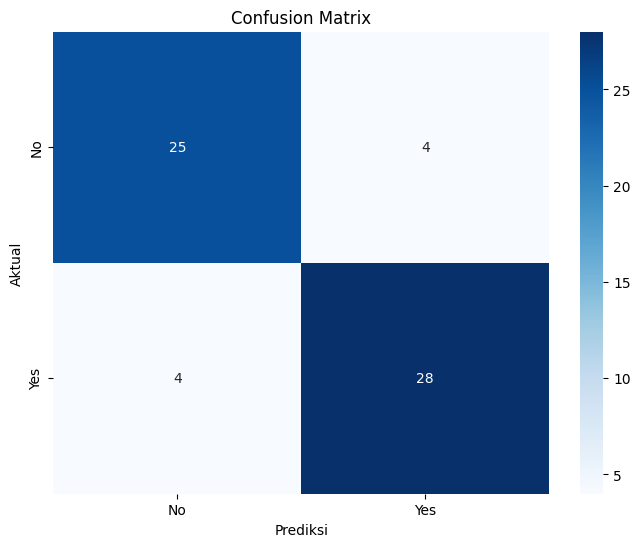

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat dan melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)
print("\nMelatih model...")
model.fit(X_train, y_train)

# Mengevaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


4. Model **Saving**

In [ ]:
import joblib

# Menyimpan model
joblib.dump(model, "heart_attack_model.pkl")
print("\nModel telah disimpan dengan nama 'heart_attack_model.pkl'")



Model telah disimpan dengan nama 'heart_attack_model.pkl'


5. Fungsi **Prediksi**

In [ ]:
def predict_heart_attack(input_data, threshold=0.5):
    """
    Memprediksi risiko serangan jantung berdasarkan input data dengan threshold kustom.

    Args:
        input_data (dict): Data input dalam bentuk dictionary.
        threshold (float): Threshold kustom untuk prediksi risiko.

    Returns:
        str: Hasil prediksi dan probabilitasnya.
    """
    # Mengonversi input data ke dalam bentuk DataFrame
    input_df = pd.DataFrame(input_data, index=[0])

    # Mendapatkan probabilitas prediksi
    prediction_proba = model.predict_proba(input_df)[0][1]

    # Membandingkan dengan threshold
    if prediction_proba >= threshold:
        return f"⚠️ Risiko Tinggi! Probabilitas: {prediction_proba * 100:.2f}%"
    else:
        return f"✅ Risiko Rendah! Probabilitas: {(1 - prediction_proba) * 100:.2f}%"

# Contoh penggunaan
example_input = {
    "age": 45,            # Umur
    "sex": 1,             # Jenis kelamin (1: laki-laki, 0: perempuan)
    "cp": 2,              # Jenis nyeri dada (0-3)
    "trtbps": 130,        # Tekanan darah istirahat
    "chol": 230,          # Kadar kolesterol
    "fbs": 1,             # Gula darah puasa (>120 mg/dl)
    "restecg": 0,         # Hasil ECG (0: normal, 1: abnormal, 2: hipertrofi)
    "thalachh": 150,      # Detak jantung maksimal
    "exng": 0,            # Angina induksi olahraga (1: ya, 0: tidak)
    "oldpeak": 1.5,       # Depresi ST
    "slp": 1,             # Kemiringan ST (0: turun, 1: datar, 2: naik)
    "caa": 0,             # Jumlah pembuluh utama (0-4)
    "thall": 2            # Thalassemia (1: normal, 2: cacat tetap, 3: cacat reversibel)
}
result = predict_heart_attack(example_input)
print(result)


⚠️ Risiko Tinggi! Probabilitas: 73.12%
